<a href="https://colab.research.google.com/github/RIZKYANGKATA/MACHLEARN/blob/main/Kuis_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset
MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

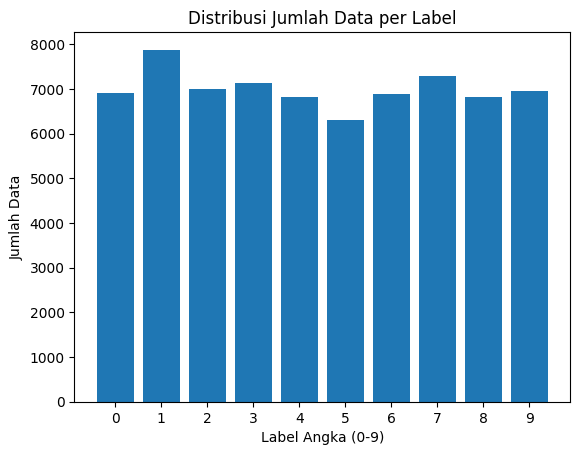

Data per label
label 0: 6903 data
label 1: 7877 data
label 2: 6990 data
label 3: 7141 data
label 4: 6824 data
label 5: 6313 data
label 6: 6876 data
label 7: 7293 data
label 8: 6825 data
label 9: 6958 data


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah data untuk setiap label (angka 0-9)
label_counts = np.bincount(mnist.target.astype(int))

# Membuat grafik batang untuk menampilkan jumlah data untuk setiap label
plt.bar(range(10), label_counts)
plt.xlabel('Label Angka (0-9)')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data per Label')
plt.xticks(range(10))
plt.show()

print('Data per label')
for i, count in enumerate(label_counts):
  print(F'label {i}: {count} data')

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat
menggunakan referensi dari Job Sheet 03.

11490434/11490434 [==============================] - 1s 0us/step


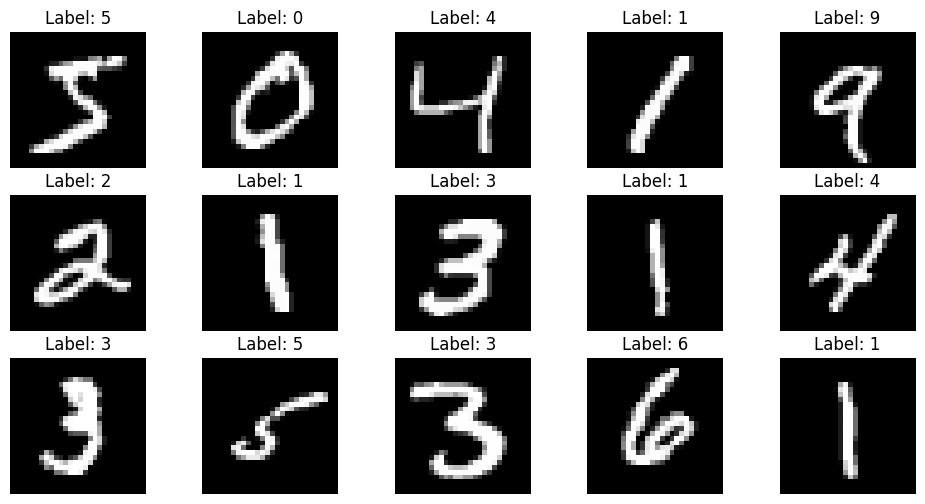

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (_, _) = mnist.load_data()

# Menampilkan 15 citra pertama beserta labelnya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk


a. Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai
fitur.

b. Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda
diperbolehkan melakukan ekspolarasi pada proses ini

In [19]:
# import tensorflow as tf

# # Memuat dataset MNIST
# mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Normalisasi data (jika diperlukan)
# x_train, x_test = x_train / 255.0, x_test / 255.0

# # Sekarang, x_train dan x_test adalah matriks 2D yang mewakili nilai piksel dari setiap citra MNIST.
# # Setiap baris dari matriks ini adalah vektor fitur yang mewakili satu citra.

# # Contoh: Menampilkan dimensi dari x_train
# print("Dimensi x_train:", x_train.shape)  # Output: (60000, 28, 28)

# # Di sini, x_train memiliki dimensi (60000, 28, 28), yang berarti ada 60.000 citra
# # dengan resolusi 28x28 piksel.

# # Anda dapat menggunakan x_train dan x_test sebagai fitur untuk pelatihan model klasifikasi atau tugas lainnya.


In [27]:
# data citra asli --->
import numpy as np
import tensorflow as tf

# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), _ = mnist.load_data()

# Mengonversi setiap citra menjadi vektor 1D
num_samples, img_height, img_width = train_images.shape
train_images_flat = train_images.reshape((num_samples, img_height * img_width))

# Menampilkan ukuran hasil ekstraksi fitur
print("Ukuran ekstraksi fitur menggunakan nilai asli piksel citra:", train_images_flat.shape)

# Menentukan jumlah komponen PCA yang diinginkan
num_pca_components = 50  # Anda dapat menyesuaikan jumlah komponen ini sesuai kebutuhan

# Menerapkan PCA pada data gambar MNIST
pca = PCA(n_components=num_pca_components)
train_images_pca = pca.fit_transform(train_images_flat)

# Menampilkan ukuran hasil ekstraksi fitur
print("Ukuran ekstraksi fitur menggunakan PCA:", train_images_pca.shape)

Ukuran ekstraksi fitur menggunakan nilai asli piksel citra: (60000, 784)
Ukuran ekstraksi fitur menggunakan PCA: (60000, 50)


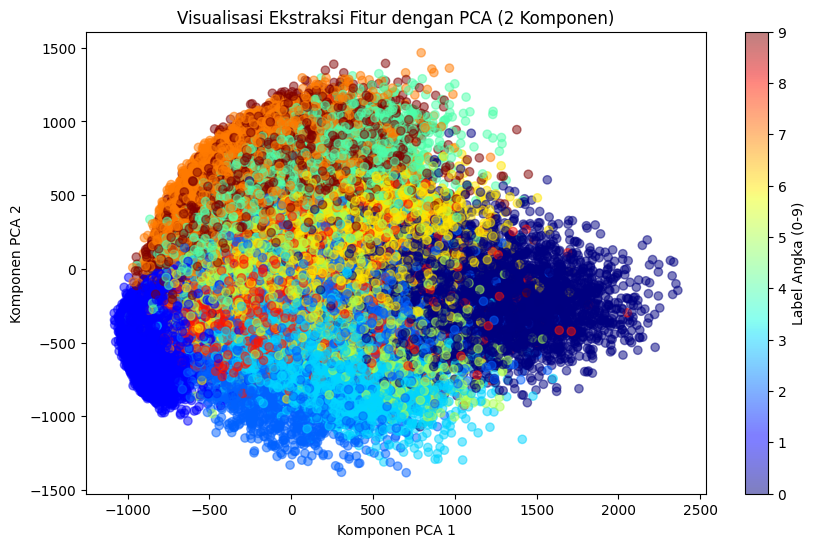

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA

# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), _ = mnist.load_data()

# Mengonversi setiap citra menjadi vektor 1D
num_samples, img_height, img_width = train_images.shape
train_images_flat = train_images.reshape((num_samples, img_height * img_width))

# Menggunakan PCA untuk mengurangi dimensi ke 2 komponen (hanya untuk visualisasi)
num_pca_components = 2
pca = PCA(n_components=num_pca_components)
train_images_pca = pca.fit_transform(train_images_flat)

# Memvisualisasikan hasil ekstraksi fitur dengan PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(train_images_pca[:, 0], train_images_pca[:, 1], c=train_labels, cmap='jet', alpha=0.5)
plt.colorbar(scatter, label='Label Angka (0-9)')
plt.title('Visualisasi Ekstraksi Fitur dengan PCA (2 Komponen)')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.show()

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split

# Misalkan Anda telah memuat dataset MNIST dan telah dinormalisasi
# x_train dan y_train adalah fitur dan label dari data training
# x_test dan y_test adalah fitur dan label dari data testing

# Rasio 70:30
x_train_70, x_test_70, y_train_70, y_test_70 = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

# Rasio 80:20
x_train_80, x_test_80, y_train_80, y_test_80 = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Rasio 90:10
x_train_90, x_test_90, y_train_90, y_test_90 = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Anda sekarang memiliki data training dan data testing dengan rasio yang berbeda.
# Variabel x_train_* dan x_test_* berisi fitur-fitur, sedangkan y_train_* dan y_test_*
# berisi label-label yang sesuai.


5. Lakukan proses klasikasi dengan menggunakan algoritma Naive Bayes dan SVM

- Anda diperbolehkan untuk melakukan tunning parameter.
- Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Misalkan Anda telah membagi data menjadi data training dan data testing dengan salah satu rasio yang telah dibahas sebelumnya
# Misalnya, kita menggunakan rasio 70:30 di sini

# Membuat model Naive Bayes
nb_model = MultinomialNB()

# Melatih model pada data training
nb_model.fit(x_train_70.reshape(-1, 28*28), y_train_70)

# Melakukan prediksi pada data testing
y_pred_nb = nb_model.predict(x_test_70.reshape(-1, 28*28))

# Menghitung akurasi
accuracy_nb = accuracy_score(y_test_70, y_pred_nb)
print("Akurasi Naive Bayes:", accuracy_nb)


Akurasi Naive Bayes: 0.8215555555555556
